In [461]:
%matplotlib inline

In [462]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)

##
b00 = 10, 15
b01 = 60, 45
##

##
p00 = 13, 19
p01 = 75, 40
##

##
b10 = 25, 80
b11 = 50, 108
##

##
p10 = 15, 83
p11 = 53, 113
##

##
b20 = 145, 45
b22 = 168, 115
##

##
p20 = 125, 70
p22 = 150, 125
##

##
b30 = 53, 153
b33 = 160, 190
##

##
p30 = 38, 160
p33 = 160, 200
##

mask = mask = np.zeros((224, 224, 3), np.uint8)
cv2.rectangle(mask, b00, b01, WHITE, cv2.FILLED)
cv2.rectangle(mask, b10, b11, WHITE, cv2.FILLED)
cv2.rectangle(mask, b20, b22, WHITE, cv2.FILLED)
cv2.rectangle(mask, b30, b33, WHITE, cv2.FILLED)


pred = pred = np.zeros((224, 224, 3), np.uint8)
cv2.rectangle(pred, p00, p01, WHITE, cv2.FILLED)
cv2.rectangle(pred, p10, p11, WHITE, cv2.FILLED)
cv2.rectangle(pred, p20, p22, WHITE, cv2.FILLED)
cv2.rectangle(pred, p30, p33, WHITE, cv2.FILLED)


gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
gray_pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)



gray_mask[gray_mask == 255] = 1
gray_pred[gray_pred == 255] = 1

In [463]:
def compute_metrics(m, p, n_classes, thresh):
        TP_r = np.zeros(n_classes)
        FP_r = np.zeros(n_classes)
        FN_r = np.zeros(n_classes)

        for i in np.unique(m): #for each plant class do the same
          if np.unique(m)[i] != 0:
            p = (p == np.unique(m)[i]) # get predicted binary mask for the i-th class
            m = (m == np.unique(m)[i]) # get binary ground truth for the i-th class
            cc = measure.label(m) # measure and label all connected regions of m
            for j in np.unique(cc):
              c = (cc==j)
              intersection = np.multiply(p, c)
              print(sum(sum(intersection))/sum(sum(c)))
              if sum(sum(intersection))/sum(sum(c)) > thresh  : # we suppose intersection & C are binary masks with Os and 1s . ( so that the sum represent number of píxels with value = 1)
                print('passed')
                TP_r[i] += 1
              else:          
                FN_r[i] += 1

            b = np.subtract(p, (np.multiply(m, p)), dtype=np.int32) # get any pixels predicted as i , but not in the groundtruth
            
            ccb = measure.label(b) # get all connected regions of prediction for the i-th class.
              
            for k in np.unique(ccb):
              c = (ccb == k)
              if sum(sum(c)) >= 47629: # make sure that c is binary with values in { 0,1 } so that FP + = 1 . sum (c) is the number of píxels with value = 1 
                FP_r[i] += 1

        return TP_r, FP_r, FN_r

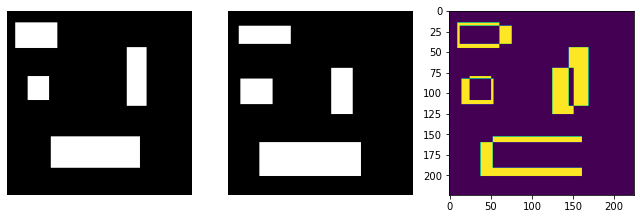

0.08893012632931269
0.6679316888045541
0.1619718309859155
0.896551724137931
passed
0.8157894736842105
passed
[0. 2.]
[0. 0.]
[0. 3.]


In [465]:
cc = measure.label(gray_mask)


plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(gray_mask, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(gray_pred, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(gray_pred != gray_mask)

plt.tight_layout()
plt.show()

tp, fp, fn = compute_metrics(gray_mask, gray_pred, 2, 0.8)

print(tp)
print(fp)
print(fn)